In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2025-10-27 11:37:04--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.8’

data.csv.8          100%[===================>]   1.41M  5.06MB/s    in 0.3s    

2025-10-27 11:37:04 (5.06 MB/s) - ‘data.csv.8’ saved [1475504/1475504]



In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
#data cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_')
strings = list(df.dtypes[df.dtypes=='object'].index)
for col in strings:
    df[col]=df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


__Exploratory Data Analysis__

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

__Distribution of price__

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

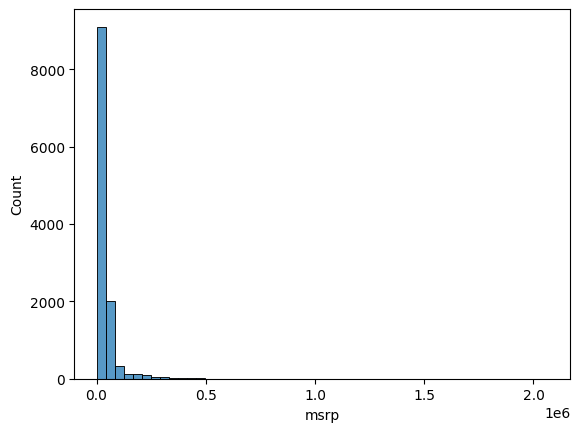

In [10]:
sns.histplot(df.msrp, bins=50) #LONG TAIL

In [11]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

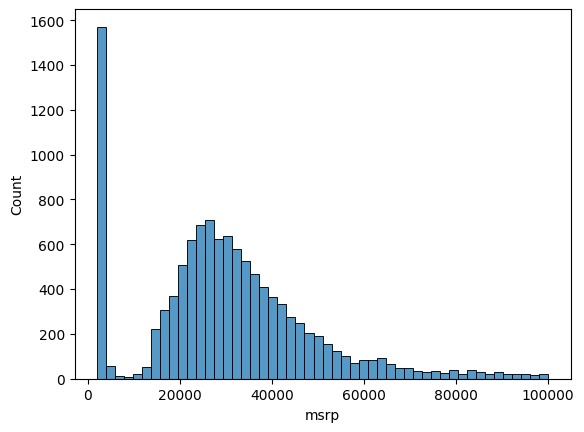

In [12]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50) #LONG TAIL

In [13]:
price_logs = np.log1p(df.msrp)

In [14]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

__Validation Framework__

In [15]:
n=int(len(df))

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [16]:
n, n_train

(11914, 7150)

In [17]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [18]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [19]:
idx = np.arange(n)

In [103]:
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3629,dodge,durango,2017,regular_unleaded,295.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,performance",large,4dr_suv,26,19,1851,42490
1306,suzuki,aerio,2005,regular_unleaded,155.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481,15649
5545,maserati,granturismo_convertible,2014,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,138800
10082,plymouth,sundance,1993,regular_unleaded,100.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,535,2000
2985,chevrolet,corvette,2015,premium_unleaded_(recommended),455.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,coupe,29,17,1385,59160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,gmc,sierra_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,549,49965
10273,ford,taurus_x,2008,regular_unleaded,260.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,22,15,5657,28880
11574,volvo,xc60,2015,regular_unleaded,325.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,24,17,870,49800
6754,bmw,m,2001,premium_unleaded_(required),315.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,convertible,23,15,3916,45990


In [21]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [104]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [23]:
len(y_train)

7150

## 2.5 Linear regression

In [24]:
df_train.iloc[10]

make                                        audi
model                                         a6
year                                        2017
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  333.0
engine_cylinders                             6.0
transmission_type                      automatic
driven_wheels                    all_wheel_drive
number_of_doors                              4.0
market_category               luxury,performance
vehicle_size                             midsize
vehicle_style                              sedan
highway_mpg                                   31
city_mpg                                      22
popularity                                  3105
msrp                                       61600
Name: 1115, dtype: object

In [25]:
xi = [453, 11, 86]
w0 = 0
w = [1, 1, 1]


In [26]:
def linear_regression(xi):
    #do something
    n=len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j]+xi[j]
        
    return pred;

In [27]:
linear_regression(xi)

553

In [28]:
## Linear regression vector form

In [29]:
def dot(xi, w):
    n = len(xi)

    res=0.0

    for j in range(n):
        res+=xi[j]*w[j]

    return res

In [30]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [31]:
linear_regression(xi)

550.0

## Training a linear regression model

In [32]:
## g(X) = yp

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X



array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

## Gram Matrix

In [33]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
XTX = X.T.dot(X)
XTX

array([[ 696471,   44115,  718540],
       [  44115,    7146,  118803],
       [ 718540,  118803, 6359986]])

In [35]:
XTX_inv =np.linalg.inv(XTX)

In [36]:
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [37]:
y=[10000,20000,15000,25000,10000,20000,15000,25000,12000]

In [38]:
w_full= XTX_inv.dot(X.T).dot(y) ## (XT X)^-1 . XT . y

In [39]:
w0= w_full[0]
w0

np.float64(26.19056150598928)

In [40]:
def train_linear_regression(X, y):
    ones=np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv =np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y) ## (XT X)^-1 . XT . y

    return w_full[0], w_full[1:]

In [41]:
train_linear_regression(X, y)

(np.float64(30006.77669255554),
 array([ -22.77425287, -257.69412959,   -2.3012064 ]))

## Car price baseline model

In [42]:
df_train.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [43]:
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
9046,92.0,4.0,30,23,1439
707,184.0,4.0,37,25,586
7403,255.0,6.0,22,14,1013
3626,295.0,6.0,27,19,1851
4587,385.0,8.0,22,15,5657
...,...,...,...,...,...
8301,340.0,6.0,23,17,258
3572,205.0,6.0,23,15,436
6173,190.0,6.0,18,14,549
8895,345.0,6.0,27,18,870


In [44]:
X_train = df_train[base].values

In [45]:
X_train

array([[  92.,    4.,   30.,   23., 1439.],
       [ 184.,    4.,   37.,   25.,  586.],
       [ 255.,    6.,   22.,   14., 1013.],
       ...,
       [ 190.,    6.,   18.,   14.,  549.],
       [ 345.,    6.,   27.,   18.,  870.],
       [ 239.,    5.,   18.,   14.,  130.]], shape=(7150, 5))

In [46]:
df_test[base].isnull().sum()

engine_hp           11
engine_cylinders     2
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [47]:
## fill them with zero
X_train = df_train[base].fillna(0)
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
9046,92.0,4.0,30,23,1439
707,184.0,4.0,37,25,586
7403,255.0,6.0,22,14,1013
3626,295.0,6.0,27,19,1851
4587,385.0,8.0,22,15,5657
...,...,...,...,...,...
8301,340.0,6.0,23,17,258
3572,205.0,6.0,23,15,436
6173,190.0,6.0,18,14,549
8895,345.0,6.0,27,18,870


In [48]:
# g(xi) = w0 + xi1.w1 + xi2.w2 +.. + xin.wn
# if xi1=0 -> g(xi) = w0 + xi2.w2
w0, w = train_linear_regression(X_train, y_train)

In [49]:
X_train.dot(w)

9046    1.042283
707     2.045676
7403    2.055767
3626    2.562742
4587    2.954598
          ...   
8301    2.916809
3572    1.622003
6173    1.392337
8895    3.029448
5699    1.996425
Length: 7150, dtype: float64

In [50]:
y_pred = w0 + X_train.dot(w)
y_pred

9046     8.976212
707      9.979606
7403     9.989696
3626    10.496672
4587    10.888527
          ...    
8301    10.850739
3572     9.555933
6173     9.326266
8895    10.963378
5699     9.930354
Length: 7150, dtype: float64

<Axes: ylabel='Count'>

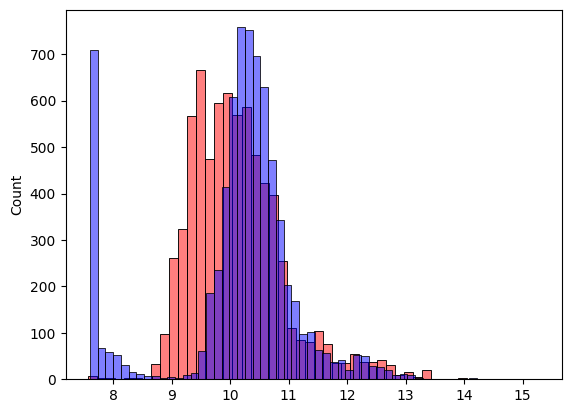

In [51]:
sns.histplot(y_pred, color='red',alpha=0.5, bins=50)
sns.histplot(y_train, color='blue',alpha=0.5, bins=50)

## RMSE

In [52]:
## Root mean square error
# RMSE = root ( 1/m *sum (g(xi) - yi)^2)

def rmse(y, y_pred):
    error =y - y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

In [53]:
rmse(y_train, y_pred)

np.float64(0.7524887149239585)

## Validating the model

In [54]:
def prepare_X(df):
    df_num = df[base]
    df_num=df_num.fillna(0)
    X = df_num.values
    return X

In [55]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


np.float64(0.7608894239330478)

## Simple feature engineering

In [56]:
2017-df_train.year

9046    23
707      2
7403    10
3626     1
4587     0
        ..
8301     3
3572    13
6173    17
8895     1
5699     7
Name: year, Length: 7150, dtype: int64

In [57]:
def prepare_X(df):
    df =df.copy() # crate a copy so that it does not modify the orginal data frame
    df['age'] = 2017-df.year
    features = base + ['age']
    df_num = df[features]
    df_num=df_num.fillna(0)
    X = df_num.values
    return X

In [58]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


np.float64(0.523897272874966)

<Axes: ylabel='Count'>

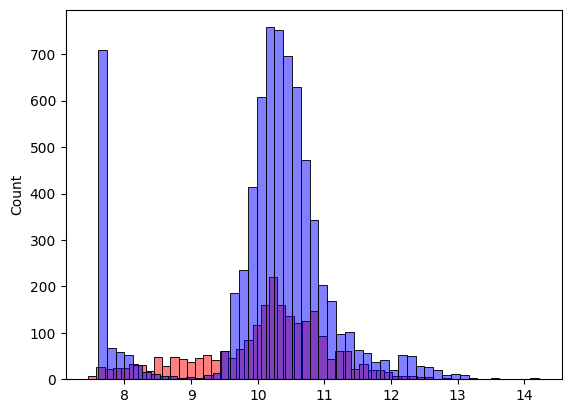

In [59]:
sns.histplot(y_pred, color='red',alpha=0.5, bins=50)
sns.histplot(y_train, color='blue',alpha=0.5, bins=50)

## Categorial variables

In [60]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9046,hyundai,scoupe,1994,regular_unleaded,92.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,30,23,1439,2000
707,mazda,6,2015,regular_unleaded,184.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,37,25,586,23845
7403,chrysler,pacifica,2007,regular_unleaded,255.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,22,14,1013,30250
3626,dodge,durango,2016,regular_unleaded,295.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,performance",large,4dr_suv,27,19,1851,41295
4587,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,15,5657,50580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8301,land_rover,range_rover,2014,premium_unleaded_(required),340.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,23,17,258,83300
3572,mitsubishi,diamante,2004,premium_unleaded_(required),205.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,23,15,436,24999
6173,gmc,jimmy,2000,regular_unleaded,190.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,18,14,549,2655
8895,volvo,s60,2016,regular_unleaded,345.0,6.0,automatic,all_wheel_drive,4.0,"factory_tuner,luxury,high-performance",midsize,sedan,27,18,870,59700


In [61]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [62]:
df_train.number_of_doors

9046    2.0
707     4.0
7403    4.0
3626    4.0
4587    4.0
       ... 
8301    4.0
3572    4.0
6173    4.0
8895    4.0
5699    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [63]:
(df_train.number_of_doors==2).astype('int')


9046    1
707     0
7403    0
3626    0
4587    0
       ..
8301    0
3572    0
6173    0
8895    0
5699    0
Name: number_of_doors, Length: 7150, dtype: int64

In [64]:
# for v in [2,3,4]:
#     df_train['number_of_doors_%s' % v] = (df_train.number_of_doors==v).astype('int')

In [65]:
def prepare_X(df):
    df =df.copy() # crate a copy so that it does not modify the orginal data frame
    features=base.copy()
    
    df['age'] = 2017-df.year
    features.append('age')
    
    for v in [2,3,4]:
     df['number_of_doors_%s' % v] = (df.number_of_doors==v).astype('int')
     features.append('number_of_doors_%s' % v)
    
    df_num = df[features]
    df_num=df_num.fillna(0)
    X = df_num.values
    
    return X

In [66]:
prepare_X(df_val)

array([[328.,   6.,  27., ...,   0.,   0.,   1.],
       [155.,   4.,  35., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.],
       ...,
       [165.,   6.,  20., ...,   0.,   0.,   1.],
       [720.,  12.,  18., ...,   1.,   0.,   0.],
       [120.,   4.,  25., ...,   1.,   0.,   0.]], shape=(2382, 9))

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)



np.float64(0.5224582865496794)

In [68]:
makes= list(df.make.value_counts().head().index)

In [69]:
def prepare_X(df):
    df =df.copy() # crate a copy so that it does not modify the orginal data frame
    features=base.copy()
    
    df['age'] = 2017-df.year
    features.append('age')
    
    for v in [2,3,4]:
     df['number_of_doors_%s' % v] = (df.number_of_doors==v).astype('int')
     features.append('number_of_doors_%s' % v)
    for v in makes:
        df['make_%s' %v] = (df.make==v).astype('int')
        features.append('make_%s' % v)
        
    df_num = df[features]
    df_num=df_num.fillna(0)
    X = df_num.values
    
    return X

In [70]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)



np.float64(0.510695079678867)

In [71]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [72]:
categorical_variables = [
    'make', 'engine_fuel_type','transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]
categorical_variables

['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [73]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [74]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [75]:
def prepare_X(df):
    df =df.copy() # crate a copy so that it does not modify the orginal data frame
    features=base.copy()
    
    df['age'] = 2017-df.year
    features.append('age')
    
    for v in [2,3,4]:
     df['number_of_doors_%s' % v] = (df.number_of_doors==v).astype('int')
     features.append('number_of_doors_%s' % v)

    for c,values in categories.items():
        for v in values:
             df['%s_%s' % (c, v) ] = (df[c]==v).astype('int')
             features.append('%s_%s' % (c,v))
        
   
        
    df_num = df[features]
    df_num=df_num.fillna(0)
    X = df_num.values
    
    return X

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


np.float64(54.32739771607633)

In [77]:
w

array([ 3.43585215e-01, -1.64087658e+01, -4.21698008e-01,  4.69381106e+00,
       -9.63563360e-04,  2.65746758e+00, -1.24327903e+03, -1.23714503e+03,
       -1.25450500e+03,  5.09320389e+00,  4.58124559e+00,  3.07765521e+00,
       -7.03538551e+00,  1.58093964e+01,  7.16427283e+01,  6.66131655e+01,
        7.06975302e+01,  8.15033938e+01,  7.25984661e+01, -6.31944845e+15,
       -6.31944845e+15, -6.31944845e+15, -6.31944845e+15, -6.31944845e+15,
        4.27063981e+15,  4.27063981e+15,  4.27063981e+15,  4.27063981e+15,
        3.82306801e-01, -3.60768205e+00, -4.15043484e+00, -1.15469644e+01,
       -5.05157590e-01, -2.57039327e+01, -2.53023794e+01, -1.70331364e+01,
       -1.86672549e-02,  5.49488013e-02,  1.85902174e-01,  3.42353009e-01,
       -1.33546042e-01])

## Regulariaztion

In [78]:
'''
when two columns get equal inv does not exist
if two columns get close in terms of values
the inv gets big in terms of magnitude

SOLN : add a constant value along the diagonal
'''
def train_linear_regression_reg(X, y, r=0.001):
    ones=np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX  = XTX + r*np.eye(XTX.shape[0])
    XTX_inv =np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y) ## (XT X)^-1 . XT . y

    return w_full[0], w_full[1:]




In [79]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train,r=0.1)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.4538760402669528)

## Tuning the model

In [105]:
## find the best r

for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10,0.01]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train,r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)
    

0.0 4.914796639809599e+16 249.9823179630575
1e-05 8.198663484951238 0.44931878975891626
0.0001 6.657780426955407 0.449318916179911
0.001 6.660597663283627 0.44932037311730016
0.1 6.5283379410587115 0.4494933249267694
1 5.807186569575858 0.4513781458556393
10 4.238323660105733 0.46861915359710016
0.01 6.647837583724293 0.4493350592608224


## Using the Model

In [106]:
df_full_train = pd.concat([df_train, df_val])

In [107]:
df_full_train=df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,dodge,durango,2017,regular_unleaded,295.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,performance",large,4dr_suv,26,19,1851
1,suzuki,aerio,2005,regular_unleaded,155.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481
2,maserati,granturismo_convertible,2014,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
3,plymouth,sundance,1993,regular_unleaded,100.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,535
4,chevrolet,corvette,2015,premium_unleaded_(recommended),455.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,coupe,29,17,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,mazda,929,1993,regular_unleaded,195.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,sedan,22,17,586
9528,land_rover,range_rover_sport,2016,premium_unleaded_(recommended),340.0,6.0,automatic,four_wheel_drive,4.0,"luxury,performance",midsize,4dr_suv,23,17,258
9529,volkswagen,jetta,2015,diesel,150.0,4.0,manual,front_wheel_drive,4.0,diesel,midsize,sedan,46,31,873
9530,ferrari,456m,2001,premium_unleaded_(required),442.0,12.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,9,2774


In [108]:
X_full_train = prepare_X(df_full_train)

In [92]:
X_full_train

array([[ 92.,   4.,  30., ...,   1.,   0.,   0.],
       [184.,   4.,  37., ...,   0.,   0.,   0.],
       [255.,   6.,  22., ...,   0.,   0.,   0.],
       ...,
       [165.,   6.,  20., ...,   0.,   0.,   0.],
       [720.,  12.,  18., ...,   1.,   0.,   0.],
       [120.,   4.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [109]:
y_full_train = np.concatenate([y_train, y_val])

In [110]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train,r=0.01)

In [112]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

np.float64(0.5069790550589673)

In [114]:
car = df_test.iloc[20].to_dict()
car

{'make': 'porsche',
 'model': 'boxster',
 'year': 2015,
 'engine_fuel_type': 'premium_unleaded_(required)',
 'engine_hp': 315.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'manual',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'luxury,high-performance',
 'vehicle_size': 'compact',
 'vehicle_style': 'convertible',
 'highway_mpg': 28,
 'city_mpg': 20,
 'popularity': 1715}

In [115]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,porsche,boxster,2015,premium_unleaded_(required),315.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,28,20,1715


In [116]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred

array([11.16941867])

In [117]:
np.expm1(y_pred)

array([70926.8665013])

In [121]:
y_test[20]

np.float64(11.055656405795794)

In [124]:
np.expm1(y_test[5])

np.float64(2356.000000000001)